In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [155]:
df = pd.read_csv("USA_Housing_Dataset.csv")

In [156]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [157]:
#EXPLORING NUMERICAL AND CATEGORICAL VARIABLES

In [158]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [159]:
# Extracting column names with numerical data types from the dataframe
df.select_dtypes("number").columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [160]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes("number").nunique().sort_values(ascending=False)

sqft_lot         2856
price            1625
sqft_living       549
sqft_above        491
sqft_basement     205
yr_built          115
yr_renovated       60
bathrooms          24
bedrooms            9
floors              6
view                5
condition           5
waterfront          2
dtype: int64

In [161]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 25]
potential_categorical_from_numerical

,bedrooms,bathrooms,floors,waterfront,view,condition
0,3.0,2.00,3.0,0,0,3
1,4.0,3.25,2.0,0,0,3
2,5.0,6.50,2.0,0,0,3
3,3.0,2.25,2.0,0,0,3
4,5.0,2.75,1.0,0,0,5
...,...,...,...,...,...,...
4135,3.0,1.75,1.0,0,0,4
4136,3.0,2.50,2.0,0,0,3
4137,3.0,2.50,2.0,0,0,3
4138,4.0,2.00,1.0,0,0,3


In [162]:
#note:waterfront is a boolean.

In [163]:
print(df['bathrooms'].nunique())

24


In [164]:
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)


In [165]:
df_categorical

,date,street,city,statezip,country,bedrooms,bathrooms,floors,waterfront,view,condition
0,2014-05-09 00:00:00,9245-9249 Fremont Ave N,Seattle,WA 98103,USA,3.0,2.00,3.0,0,0,3
1,2014-05-09 00:00:00,33001 NE 24th St,Carnation,WA 98014,USA,4.0,3.25,2.0,0,0,3
2,2014-05-09 00:00:00,7070 270th Pl SE,Issaquah,WA 98029,USA,5.0,6.50,2.0,0,0,3
3,2014-05-09 00:00:00,820 NW 95th St,Seattle,WA 98117,USA,3.0,2.25,2.0,0,0,3
4,2014-05-10 00:00:00,10834 31st Ave SW,Seattle,WA 98146,USA,5.0,2.75,1.0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,501 N 143rd St,Seattle,WA 98133,USA,3.0,1.75,1.0,0,0,4
4136,2014-07-09 00:00:00,14855 SE 10th Pl,Bellevue,WA 98007,USA,3.0,2.50,2.0,0,0,3
4137,2014-07-09 00:00:00,759 Ilwaco Pl NE,Renton,WA 98059,USA,3.0,2.50,2.0,0,0,3
4138,2014-07-10 00:00:00,5148 S Creston St,Seattle,WA 98178,USA,4.0,2.00,1.0,0,0,3


In [166]:
# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [167]:
df_numerical

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.760000e+05,1340,1384,1340,0,2008,0
1,8.000000e+05,3540,159430,3540,0,2007,0
2,2.238888e+06,7270,130017,6420,850,2010,0
3,3.240000e+05,998,904,798,200,2007,0
4,5.499000e+05,3060,7015,1600,1460,1979,0
...,...,...,...,...,...,...,...
4135,3.081667e+05,1510,6360,1510,0,1954,1979
4136,5.343333e+05,1460,7573,1460,0,1983,2009
4137,4.169042e+05,3010,7014,3010,0,2009,0
4138,2.034000e+05,2090,6630,1070,1020,1974,0


In [168]:
# Retrieving column names with object (typically string) data types from the dataframe
df.select_dtypes("object").columns

Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [169]:
# Counting and sorting the unique values for each object (string) column in descending order
df.select_dtypes("object").nunique().sort_values(ascending=False)

# All columns seem categorical, as there isn't a wide variability of values.

street      4079
statezip      77
date          68
city          43
country        1
dtype: int64

In [170]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns)

True

In [171]:
#DATA CLEANING

In [172]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [173]:
df.columns[df.isnull().mean() > 0.8] #there are no missing values.

Index([], dtype='object')

In [174]:
# Removing the "date" column from the dataframe because it doesn't give any real insight.
df.drop("date", inplace=True, axis=1)

In [175]:
#checking for duplicates
duplicates = df.duplicated(subset=["statezip", "price", "bedrooms", 'yr_built', 'street', 'sqft_above'], keep=False)
print(f"Found {duplicates.sum()} potential duplicates.")

Found 2 potential duplicates.


In [176]:
df.duplicated().sum()

np.int64(0)

In [178]:
#UNIVARIATE ANALYSIS

In [179]:
#Categorical Variables
#Frequency table for bedrooms
frequency_table_bedroom = df['bedrooms'].value_counts()

In [180]:
frequency_table_bedroom

bedrooms
3.0    1833
4.0    1382
2.0     500
5.0     317
6.0      56
1.0      37
7.0      11
8.0       2
0.0       2
Name: count, dtype: int64

In [181]:
bedrooms_table = pd.crosstab(index = df_categorical['bedrooms'],  # Make a crosstab
                              columns="count")      # Name the count column
bedrooms_table

col_0,count
bedrooms,
0.0,2
1.0,37
2.0,500
3.0,1833
4.0,1382
5.0,317
6.0,56
7.0,11
8.0,2


In [182]:
proportion_bedrooms=(bedrooms_table /bedrooms_table.sum()).round(2)
proportion_bedrooms

col_0,count
bedrooms,
0.0,0.00
1.0,0.01
2.0,0.12
3.0,0.44
4.0,0.33
5.0,0.08
6.0,0.01
7.0,0.00
8.0,0.00


In [183]:
#Approx. 44 percent of the houses have 3 bedrooms, whereas 12 percent of the houses have 2 bedrooms. 

In [184]:
frequency_table_waterfront = df['waterfront'].value_counts()

In [185]:
proportion_waterfront=(waterfront_table/waterfront_table.sum()).round(2)
proportion_waterfront

col_0,count
waterfront,
0,0.99
1,0.01


In [186]:
#99 percent of the houses have no waterfront. Only one percent of the houses have a waterfront.

In [187]:
waterfront_table = pd.crosstab(index = df_categorical['waterfront'],  # Make a crosstab
                              columns="count")      # Name the count column
waterfront_table

col_0,count
waterfront,
0,4109
1,31


In [188]:
frequency_table_condition = df['condition'].value_counts()

In [189]:
frequency_table_condition

condition
3    2596
4    1114
5     398
2      27
1       5
Name: count, dtype: int64

In [190]:
condition_table = pd.crosstab(index = df_categorical['condition'],  # Make a crosstab
                              columns="count")      # Name the count column
condition_table

col_0,count
condition,
1,5
2,27
3,2596
4,1114
5,398


In [191]:
proportion_condition=(condition_table/condition_table.sum()).round(2)
proportion_condition

col_0,count
condition,
1,0.00
2,0.01
3,0.63
4,0.27
5,0.10


In [192]:
#63 percent of the houses of a condition of 3 whereas 10 percent of the houses have a condition of 5.

In [193]:
#Insights: The most common house condition is 3 with 2596 houses, whereas the 3 bedroom houses are the most common.1833 houses have 3 bedrooms.
#Waterfront houses are not common. There are only 31 waterfront houses.

In [194]:
#Calculating proportions: 

C:\Users\carpa\AppData\Local\Temp\ipykernel_46844\3611138521.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_bedroom.index, y=frequency_table_bedroom.values, palette="Set3")


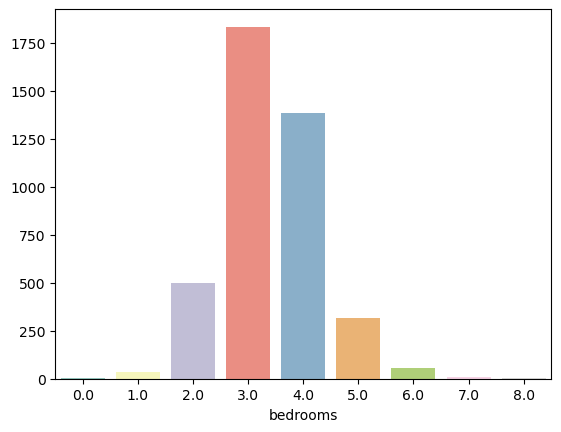

In [195]:
sns.barplot(x=frequency_table_bedroom.index, y=frequency_table_bedroom.values, palette="Set3")
plt.show();

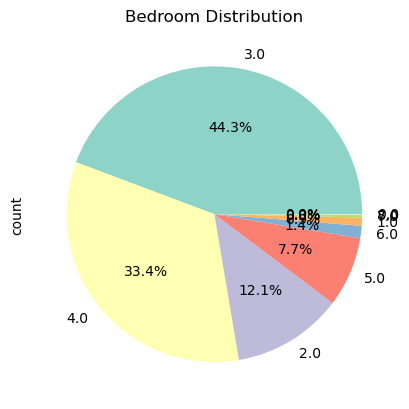

<Figure size 10000x10000 with 0 Axes>

In [196]:
frequency_table_bedroom.plot.pie(autopct='%1.1f%%', startangle=00, colors=sns.color_palette("Set3"))
plt.title('Bedroom Distribution')
plt.figure(figsize=(100,100))
plt.show()

In [ ]:
#Insights: The average mean price of the houses in the dataset are approx 

In [199]:
df["price_USD"] = df["price"].map("${:,.2f}".format)

In [204]:
df.drop("price_USD", inplace=True, axis=1)

In [208]:
df["price"] = df["price"].round(2)

In [209]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,376000.00,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,800000.00,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2238888.00,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,324000.00,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,549900.00,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,308166.67,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,534333.33,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,416904.17,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,203400.00,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [211]:
# The average (mean) sale price of the houses in the dataset is approximately $553,062.90.
#The median sale price (middle value when sorted) stands at $460,000.00. The median is lower than the mean, suggesting a skew in the distribution
#of sale prices towards higher values. 
#Std deviation is approx $583,686.50 which is higher than the mean, suggesting high variability of prices from the average price.
#The average price is not a reliable indicator for individual house prices.
#Minimum sales price is 0 whereas max sales price is 

In [215]:
df = df[df['price'] != 0]

In [222]:
df['price'] = df['price'].round(4)

C:\Users\carpa\AppData\Local\Temp\ipykernel_46844\2225757146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].round(4)


In [223]:
# Summary statistics for the dataset
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.091000e+03,4091.000000,4091.000000,4091.000000,4.091000e+03,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000
mean,5.596872e+05,3.393547,2.156624,2135.931313,1.467661e+04,1.514300,0.006844,0.240039,3.449768,1825.789538,310.141775,1970.824737,808.316304
std,5.840060e+05,0.899115,0.776501,949.318839,3.596527e+04,0.535172,0.082457,0.776533,0.676252,852.802465,461.961346,29.840158,979.387848
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.250938e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.646000e+05,3.000000,2.250000,1980.000000,7.665000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.600000e+05,4.000000,2.500000,2610.000000,1.095250e+04,2.000000,0.000000,0.000000,4.000000,2303.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,7680.000000,4820.000000,2014.000000,2014.000000


In [224]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,376000.00,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,800000.00,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2238888.00,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,324000.00,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,549900.00,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,308166.67,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,534333.33,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,416904.17,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,203400.00,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
# The average (mean) sale price of the houses in the dataset is approximately $559,687.2.
#The median sale price (middle value when sorted) stands at $464,600.00. The median is lower than the mean, suggesting a skew in the distribution
#of sale prices towards higher values. 
#Std deviation is approx $584,006.00 which is higher than the mean, suggesting high variability of prices from the average price.
#The average price is not a reliable indicator for individual house prices.
#Minimum sales price is  whereas max sales price is $7,800.00 whereas the max sales price is $26.59 million.

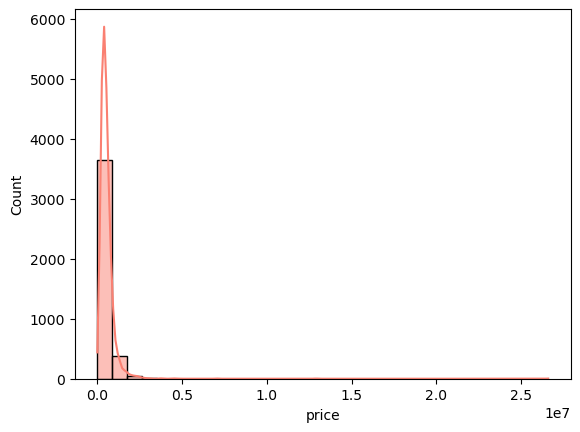

In [226]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon")
plt.show()

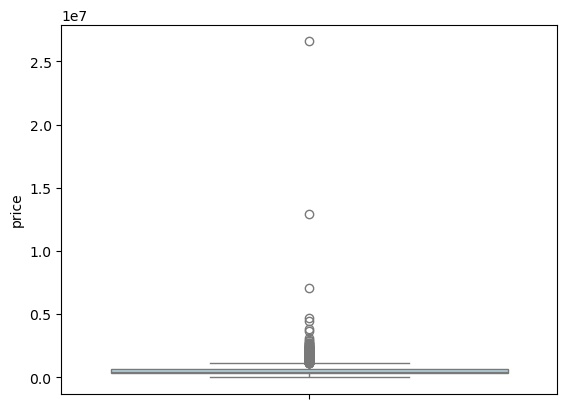

In [227]:
sns.boxplot(data = df['price'], color="lightblue")
plt.show()

In [236]:
def tukeys_test_outliers(df):
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = df['price'][(df['price'] < lower_bound) | (df['price'] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

In [245]:
IQR = Q3 - Q1 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df['price'][(df['price'] < lower_bound) | (df['price'] > upper_bound)]

In [246]:
len(outliers)

216

In [242]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
Q1, Q3

(np.float64(325093.75), np.float64(660000.0))

In [237]:
tukeys_test_outliers(df)

(2        2238888.00
 11       1225000.00
 18       1200000.00
 22       1575000.00
 28       1315000.00
            ...     
 3888     2199900.00
 3890    26590000.00
 4005     2560498.33
 4007     1337044.20
 4112     1288333.33
 Name: price, Length: 216, dtype: float64,
 np.float64(-177265.625),
 np.float64(1162359.375))

In [239]:
negatives = df[df['price'] < 0]
print(f"Negative prices:\n{negatives}")

Negative prices:
Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country]
Index: []


In [247]:
#filtering out the outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

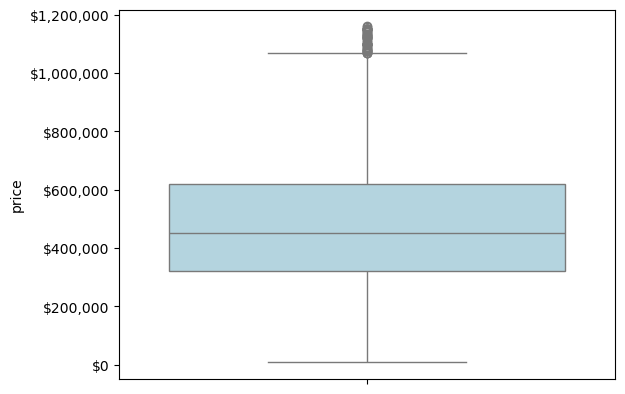

In [254]:
sns.boxplot(data = df_filtered['price'], color="lightblue")
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.show()

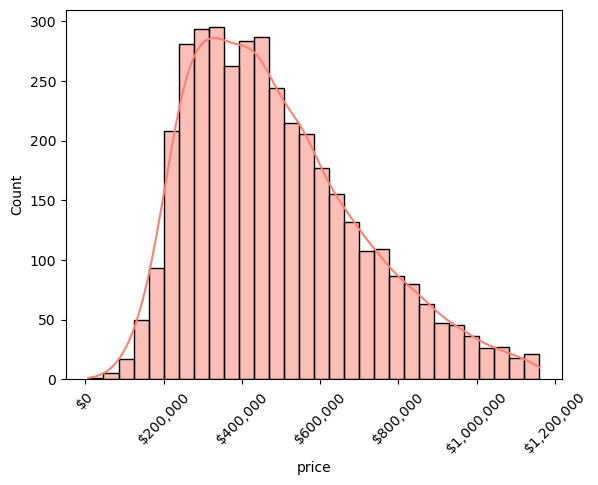

In [253]:
sns.histplot(df_filtered['price'], kde=True, bins=30, color="salmon")
plt.gca().xaxis.set_major_formatter('${x:,.0f}')
plt.xticks(rotation=45)
plt.show()

In [256]:
# Discretizing 'SalePrice' into 4 categories
bins = [0, 300000, 600000, 1200000,df['price'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['SalePrice_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

C:\Users\carpa\AppData\Local\Temp\ipykernel_46844\733528356.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SalePrice_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)


In [257]:
df.SalePrice_category.value_counts()

SalePrice_category
Medium       1997
High         1051
Low           847
Very High     196
Name: count, dtype: int64

C:\Users\carpa\AppData\Local\Temp\ipykernel_46844\742043015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='condition', y='price', palette="coolwarm")


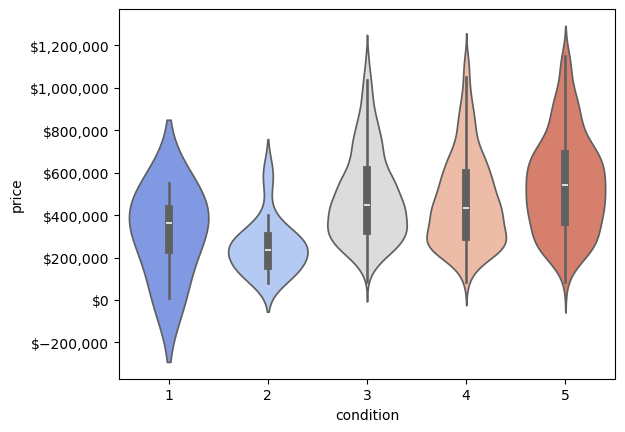

In [263]:
#using violin plot to visualize the distribution of price across different conditions
sns.violinplot(data=df_filtered, x='condition', y='price', palette="coolwarm")
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.show()

In [290]:
#The houses with better condition (3,4,5) have prices in the upper range. Category 5 has the highest median house price.
#For the house condition 1 majority of the houses are priced in the mid-lower range. 
#Condition 2 category has a more condensed price distribution, majority of the houses placed in the middle range.

C:\Users\carpa\AppData\Local\Temp\ipykernel_46844\3993032993.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='condition', y='price', palette="coolwarm")


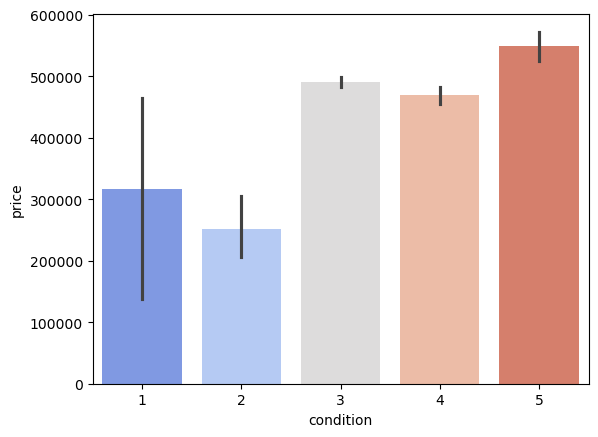

In [293]:
sns.barplot(data=df_filtered, x='condition', y='price', palette="coolwarm")
plt.show()

In [ ]:
#category 5 has the highest average price, category 1 has the lowest average house price among all the categories.

In [272]:
#Calculate average price for each city
avg_price_city=df_filtered.groupby('city')['price'].mean()

In [273]:
avg_price_city

city
Algona                196440.000000
Auburn                298499.800807
Beaux Arts Village    745000.000000
Bellevue              693713.930524
Black Diamond         428083.333333
Bothell               479669.416667
Burien                358425.748226
Carnation             462443.705882
Clyde Hill            936000.000000
Covington             258783.976757
Des Moines            308802.263654
Duvall                408406.495641
Enumclaw              319007.715926
Fall City             551357.142857
Federal Way           294558.829609
Issaquah              578816.625190
Kenmore               448477.309825
Kent                  298214.013758
Kirkland              589405.324936
Lake Forest Park      470229.032258
Maple Valley          340982.489101
Medina                188000.000000
Mercer Island         807194.986042
Milton                285000.000000
Newcastle             636807.413793
Normandy Park         483019.642857
North Bend            405773.229556
Pacific               2

C:\Users\carpa\AppData\Local\Temp\ipykernel_46844\783728783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_df, x='city', y='avg_price', palette="Set3")


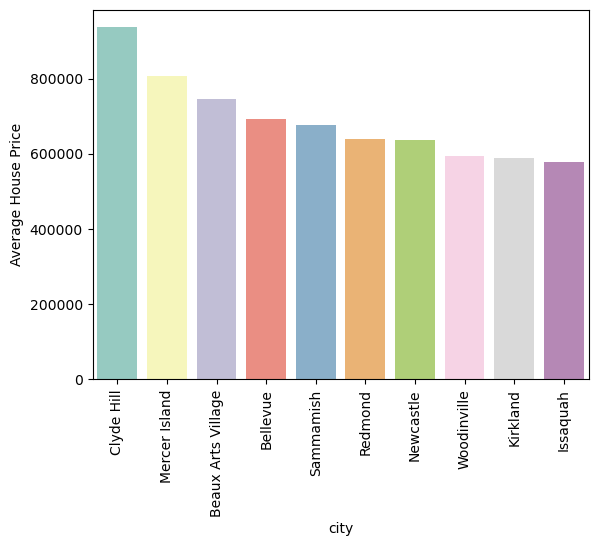

In [284]:
top_10_df = avg_price_city.sort_values(ascending=False).head(10).reset_index()
top_10_df.columns = ['city', 'avg_price']  # Rename columns

# Now plot with seaborn
sns.barplot(data=top_10_df, x='city', y='avg_price', palette="Set3")
plt.xticks(rotation=90)
plt.ylabel("Average House Price")
plt.show()

In [ ]:
#Scatter-Plot for price and sqft living area


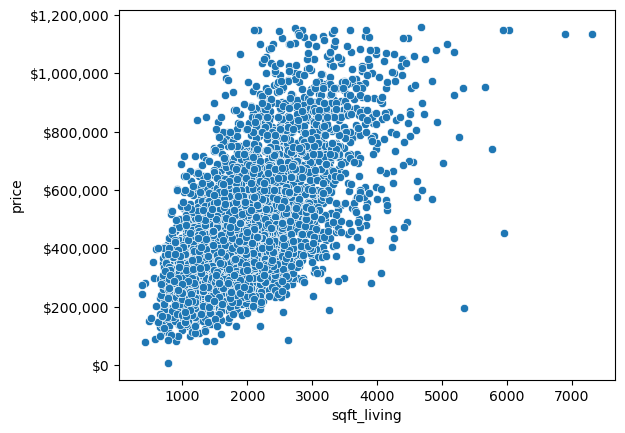

In [302]:
sns.scatterplot(data=df_filtered, x='sqft_living', y='price')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.show()

In [295]:
# Calculating the Pearson correlation coefficient between 'SalePrice' and 'GrLivArea' columns
correlation = df['price'].corr(df['sqft_living'])
correlation

np.float64(0.43473316177999544)

In [297]:
correlation = df_filtered['price'].corr(df['sqft_living'])
correlation

np.float64(0.6335905873952585)

In [296]:
# Calculating the Spearman rank correlation between 'SalePrice' and 'GrLivArea' 
correlation = df['price'].corr(df['sqft_living'], method='spearman')
correlation

np.float64(0.65881664919208)

In [298]:
correlation = df_filtered['price'].corr(df['sqft_living'], method='spearman')
correlation

np.float64(0.6157761160358401)

In [299]:
# Calculating the Spearman correlation coefficients between 'SalePrice' and all other numerical variables
spearman_correlations = df_numerical.corrwith(df['price'], method='spearman')

# Sorting the correlations for better visualization
spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)

# Displaying the correlations
spearman_correlations_sorted

price            1.000000
sqft_living      0.658817
sqft_above       0.555233
sqft_basement    0.248591
yr_built         0.091523
sqft_lot         0.089582
yr_renovated    -0.074041
dtype: float64

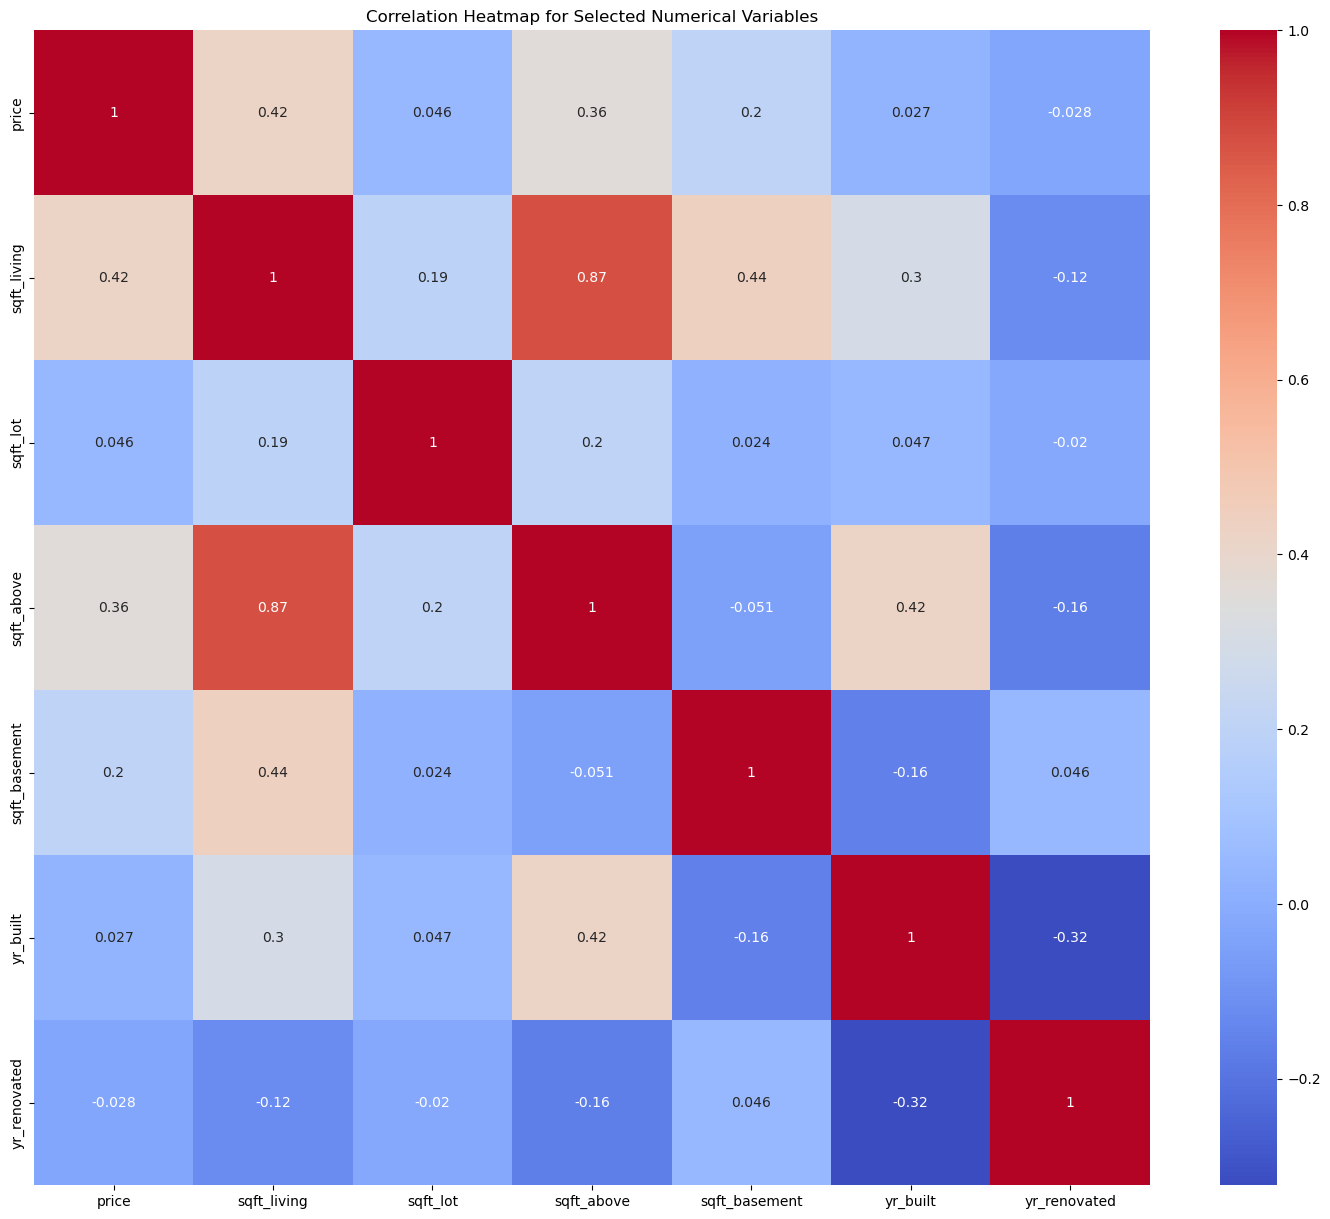

In [316]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [264]:
df.to_csv("cleaned_US_housing_data.csv", index=False)

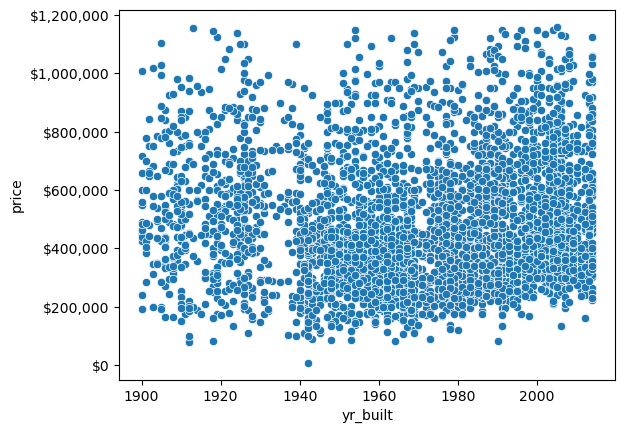

In [305]:
sns.scatterplot(data=df_filtered, x='yr_built', y='price')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.show()

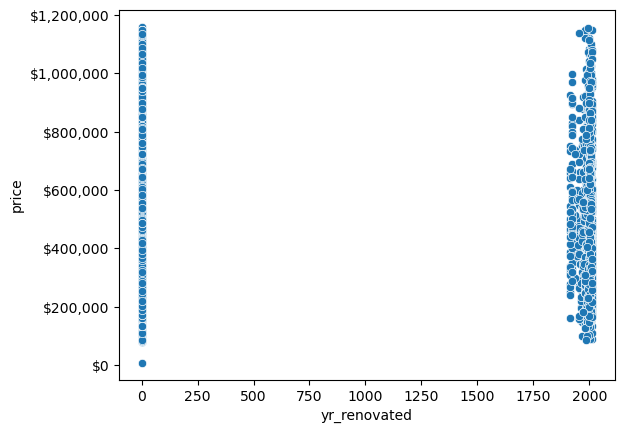

In [306]:
sns.scatterplot(data=df_filtered, x='yr_renovated', y='price')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.show()

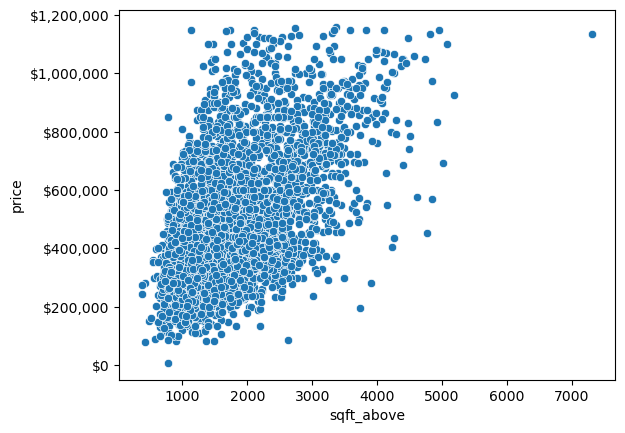

In [307]:
sns.scatterplot(data=df_filtered, x='sqft_above', y='price')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.show()

C:\Users\carpa\AppData\Local\Temp\ipykernel_46844\1758023445.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_filtered, x='yr_built', y='price', ci=None)


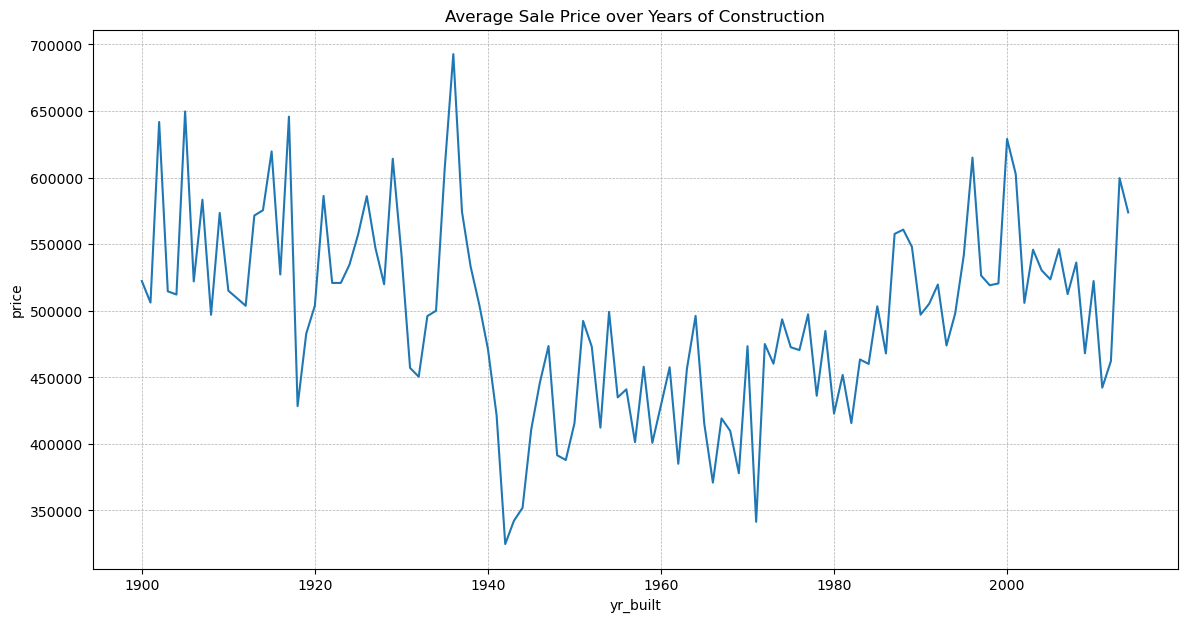

In [309]:
# Plotting a line graph to visualize the trend of average 'SalePrice' across different 'YearBuilt'
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtered, x='yr_built', y='price', ci=None)
plt.title('Average Sale Price over Years of Construction')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

C:\Users\carpa\AppData\Local\Temp\ipykernel_46844\4225633710.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='condition', y='sqft_above', palette="coolwarm")


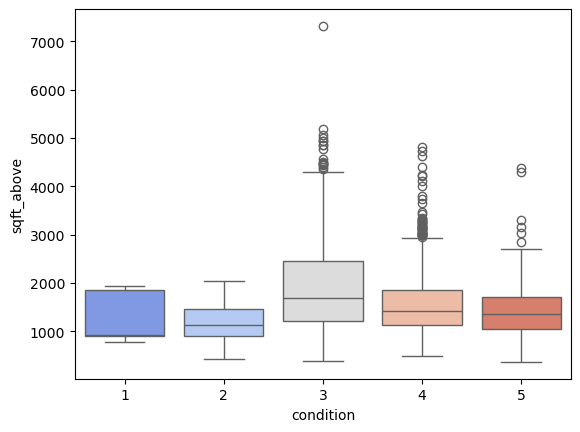

In [311]:
sns.boxplot(data=df_filtered, x='condition', y='sqft_above', palette="coolwarm")
plt.show()

In [312]:
#water front houses and price
# Calculate average prices
avg_prices = df.groupby('waterfront')['price'].mean().reset_index()
avg_prices['waterfront'] = avg_prices['waterfront'].map({0: 'Non-Waterfront', 1: 'Waterfront'})  # Convert labels
print(avg_prices)

       waterfront         price
0  Non-Waterfront  5.525881e+05
1      Waterfront  1.589821e+06


C:\Users\carpa\AppData\Local\Temp\ipykernel_46844\2981158266.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_prices, x='waterfront', y='price', palette="coolwarm")


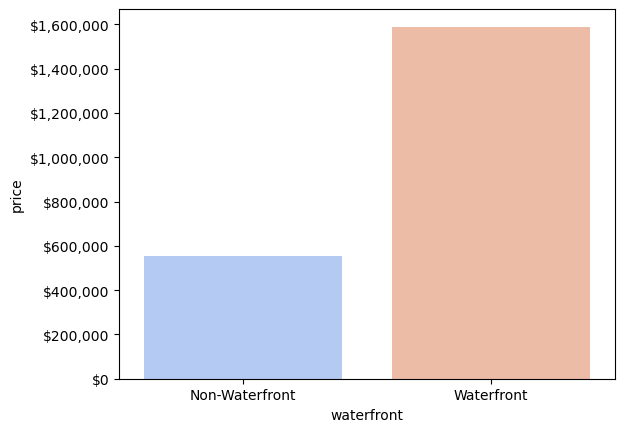

In [314]:
sns.barplot(data=avg_prices, x='waterfront', y='price', palette="coolwarm")
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.show()